In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from matplotlib.colors import ListedColormap

In [17]:
# Load the Pima Indians Diabetes dataset 
diabetes_data = pd.read_csv('diabetes.csv')

In [18]:
# Data preprocessing
X = diabetes_data.drop('Outcome', axis=1)  # Features (excluding the 'Outcome' column)
y = diabetes_data['Outcome']  # Target variable

In [19]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train the K-Nearest Neighbors classifier (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Adjust K as needed
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

In [22]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6493506493506493
Precision: 0.5072463768115942
Recall: 0.6363636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



In [27]:
# Plot the confusion matrix with custom labels and a different colormap ('Blues')
confusion = confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion.flatten() / np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

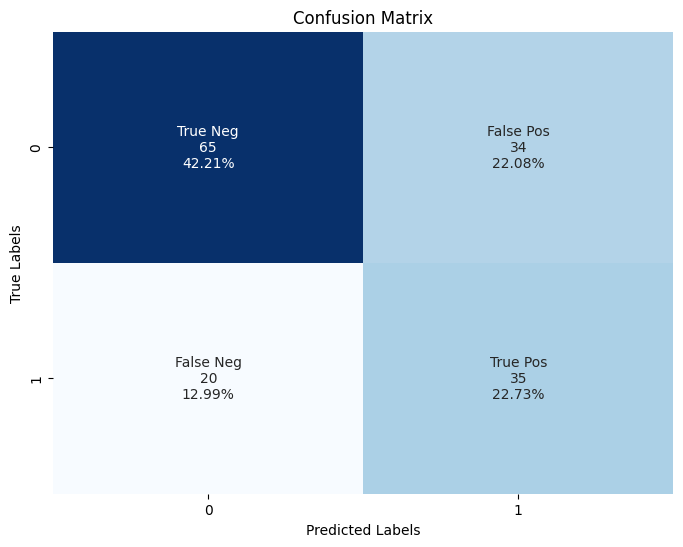

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()